Day 1 

I) Implementation of different estimators 

In [29]:
import numpy as np
import pandas as pd
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import of SPY data

In [30]:
data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

[*********************100%%**********************]  1 of 1 completed


Close to close estimator 

In [31]:
def close_to_close(data):
    data['Close-to-close'] = np.abs(np.log(data['Close'] / data['Close'].shift(1)))
    Close_to_close=data['Close-to-close']
    return Close_to_close

Parkinson estimator 

In [32]:
def Parkinson(data):
    Parkinson = np.sqrt(1 / (4 * np.log(2)) * np.log(data['High'] / data['Low']) ** 2)
    return Parkinson

Garman Klass estimator

In [33]:
def garman_klass__estimator(data):
    sigma_GK = 0.5 * (np.log(data['High']/data['Low']))**2 - (2*np.log(2)-1) * (np.log(data['Close']/data['Open']))**2
    sigma_GK = np.sqrt(sigma_GK)
    return sigma_GK

Roger Satchell estimator

In [34]:
def rogers_satchell_volatility(data):
    high = data['High']
    low = data['Low']
    close = data['Close']
    open = data['Open']

    log_hc = np.log(high / close)
    log_ho = np.log(high / open)
    log_lc = np.log(low / close)
    log_lo = np.log(low / open)

    sigma_rs = np.sqrt(log_hc * log_ho - log_lc * log_lo)
    return sigma_rs

Yang-Zhang estimator

In [35]:

def calculate_yang_zhang(data, k):
    """
    Calcule l'indicateur Yang-Zhang pour une valeur donnée de k.
    """
    # Calculer l'indicateur Yang-Zhang
    yang_zhang = np.sqrt(
        np.log(data['Open'] / data['Close'].shift(1)) ** 2
        + k * np.log(data['Open'] / data['Close']) ** 2
        + (1 - k) * (np.log(data['High'] / data['Close']) * np.log(data['High'] / data['Open'])
                  + np.log(data['Low'] / data['Close']) * np.log(data['Low'] / data['Open'])))
    
    return yang_zhang

Graphs 

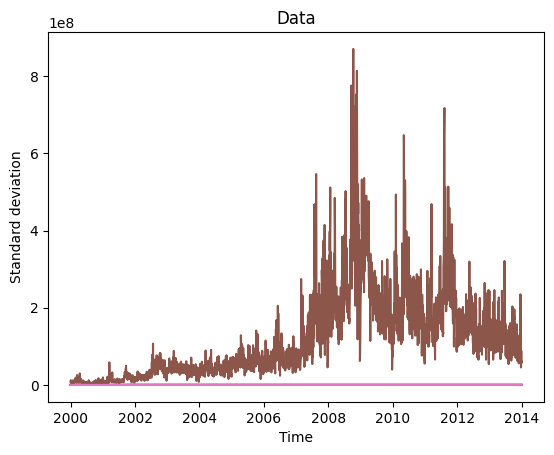

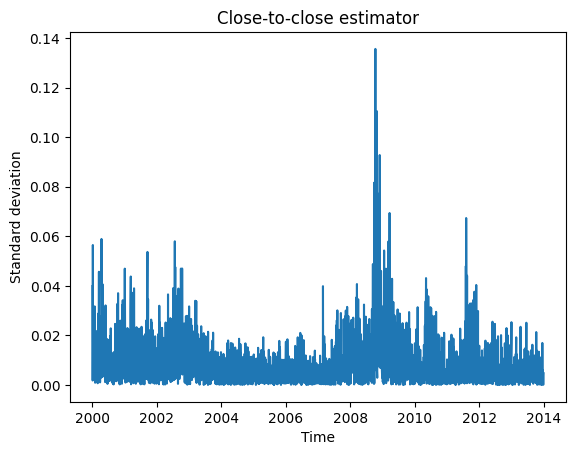

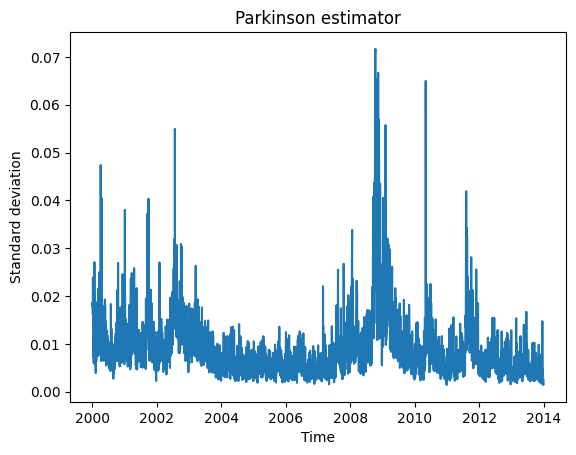

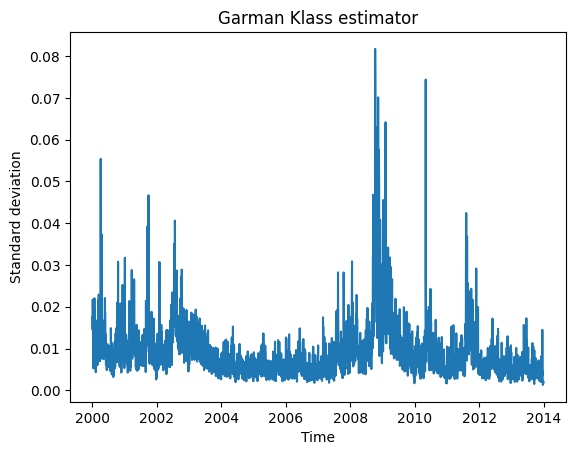

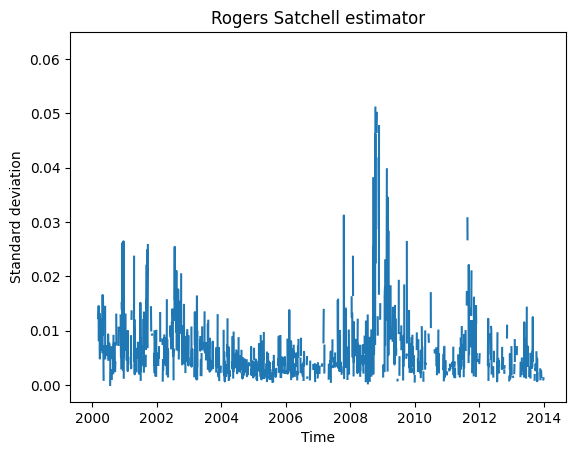

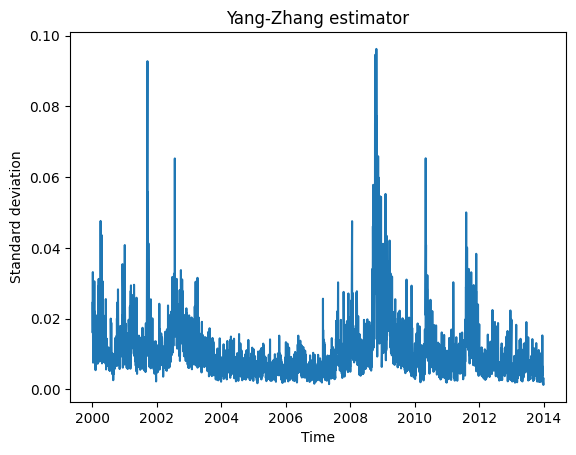

In [36]:
parkinson_data = Parkinson(data) 
garman_data = garman_klass__estimator(data) 
rogers_data = rogers_satchell_volatility(data) 
close_data = close_to_close(data) 

plt.plot(data)
plt.title('Data')
plt.xlabel('Time')
plt.ylabel('Standard deviation')
plt.show()

plt.plot(close_data)
plt.title('Close-to-close estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()


plt.plot(parkinson_data)
plt.title('Parkinson estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()


plt.plot(garman_data)
plt.title('Garman Klass estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()

plt.plot(rogers_data)
plt.title('Rogers Satchell estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()

yangzhang= calculate_yang_zhang(data,k=0.5)

plt.plot(yangzhang)
plt.title('Yang-Zhang estimator')
plt.ylabel('Standard deviation')
plt.xlabel('Time')
plt.show()

II) Comparison between estimators 

Correlation matrix

In [53]:

# Correlation between the five volatility estimators

k = 1 # Set the value k

data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

A = pd.Series(close_to_close(data))
B = garman_klass__estimator(data)
C = pd.Series(Parkinson(data))
D = rogers_satchell_volatility(data)
E = calculate_yang_zhang(data, k)

# A list of the 5 estimators (as dataframes)
estimators = [A,B,C,D,E]

for i, est in enumerate(estimators):
    if not isinstance(est, pd.Series):
        print(f"Estimator {i} is not a pandas Series.")
    if np.isinf(est).any():
        print(f"Estimator {i} contains infinite values.")

# Computing the correlation matrix
correlation_matrix = np.zeros((5,5))
for i in range(len(estimators)):
    for j in range(len(estimators)):
        correlation_value = estimators[i].corr(estimators[j])
        if not pd.isna(correlation_value):
            correlation_matrix[i, j] = correlation_value



labels = ['Close to close', 'Garman Klass', 'Parkinson', 'Roger Satchell', 'Yang Zhang']

df_correlation = pd.DataFrame(correlation_matrix, index=labels, columns=labels)

print(df_correlation)

[*********************100%%**********************]  1 of 1 completed

                Close to close  Garman Klass  Parkinson  Roger Satchell  \
Close to close        1.000000      0.621091   0.731183        0.441660   
Garman Klass          0.621091      1.000000   0.967018        0.820563   
Parkinson             0.731183      0.967018   1.000000        0.728378   
Roger Satchell        0.441660      0.820563   0.728378        1.000000   
Yang Zhang            0.848369      0.695364   0.828181        0.479573   

                Yang Zhang  
Close to close    0.848369  
Garman Klass      0.695364  
Parkinson         0.828181  
Roger Satchell    0.479573  
Yang Zhang        1.000000  


Correlation with true volatility

In [38]:
# Téléchargement des données pour SPY comme précédemment
data = yf.download('SPY', start='2000-01-01', end='2014-01-01')

# Simulation simple de la vraie volatilité (ici nous utilisons l'écart type des prix de clôture pour simuler)
true_volatility = data['Close'].rolling(window=30).std()

# Assurons que true_volatility est une série complète pour la période (sans NaN au début)
true_volatility = true_volatility.fillna(method='bfill')

[*********************100%%**********************]  1 of 1 completed


In [39]:
# Initialisation du tableau pour stocker les corrélations
correlation_with_true_vol = np.zeros(5)

# Calcul de la corrélation pour chaque estimateur avec la vraie volatilité
for i in range(len(correlation_with_true_vol)):
    correlation_with_true_vol[i] = estimators[i].corr(true_volatility)

# Création du DataFrame pour afficher les résultats
df_corr_true_vol = pd.DataFrame([correlation_with_true_vol], columns=labels)

print("Correlation with True Volatility:\n", df_corr_true_vol)

Correlation with True Volatility:
    Close to Close  Garman Klass  Parkinson  Roger Satchell  Yang Zhang
0        0.443313      0.622307   0.615934        0.552727    0.504924


Estimators efficiency

In [40]:
# Calcul de la variance de la vraie volatilité pour la période considérée
true_variance = true_volatility.var()

# Initialisation du tableau pour stocker les efficiences
efficiency_vector = np.zeros(5)

# Calcul de l'efficacité de chaque estimateur par rapport à la vraie volatilité
for i in range(len(efficiency_vector)):
    efficiency_vector[i] = true_variance / estimators[i].var()

# Création du DataFrame pour afficher les résultats
df_efficiency = pd.DataFrame([efficiency_vector], columns=labels)

print("Efficiency of Estimators:\n", df_efficiency)

Efficiency of Estimators:
    Close to Close  Garman Klass     Parkinson  Roger Satchell    Yang Zhang
0    20253.973378  42809.182226  43364.971547    54721.679971  24670.783472


Monthly MSE of Volatility Estimators

In [54]:
data['Date'] = data.index
data['Month'] = data['Date'].dt.to_period('M')

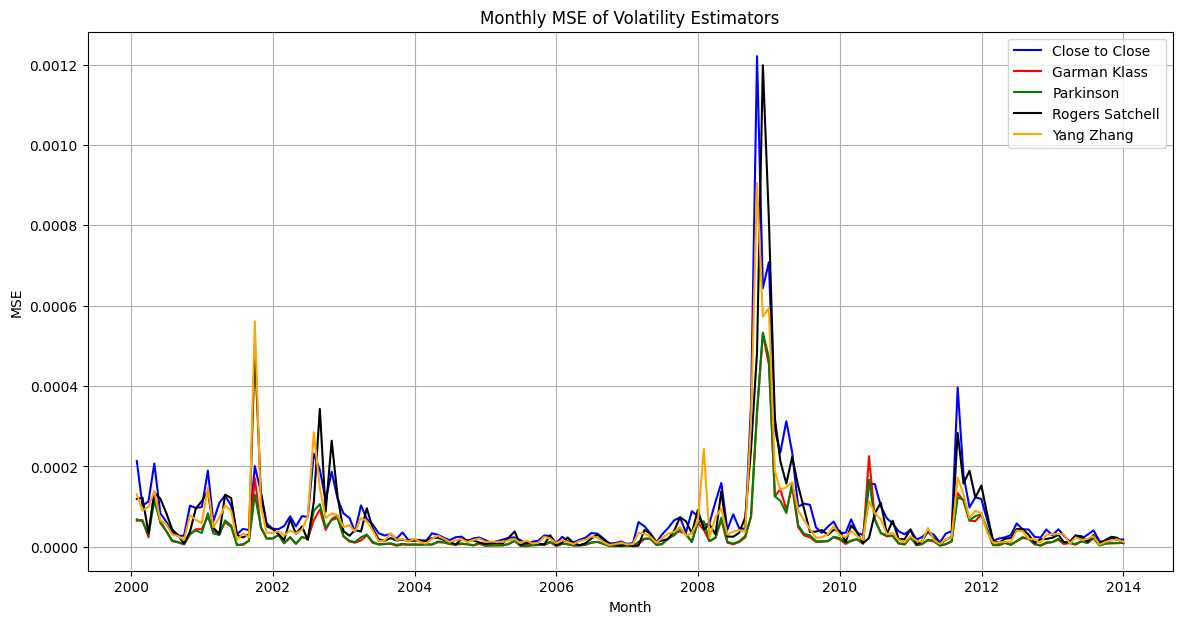

In [55]:
# Assurez-vous que l'index est de type DateTimeIndex
data.index = pd.to_datetime(data.index)

# Calculer les estimateurs de volatilité
data['Estimator1'] = pd.Series(close_to_close(data))
data['Estimator2'] = pd.Series(garman_klass__estimator(data))
data['Estimator3'] = pd.Series(Parkinson(data))
data['Estimator4'] = pd.Series(rogers_satchell_volatility(data))
data['Estimator5'] = pd.Series(calculate_yang_zhang(data, k=1))

# Calculer la vraie volatilité mensuelle (par exemple, l'écart-type mensuel des rendements quotidiens)
data['True_Volatility'] = data['Close'].pct_change().rolling(window=30).std()
data = data.fillna(method='bfill')

# Grouper par mois et calculer la volatilité réelle mensuelle
monthly_true_volatility = data['True_Volatility'].resample('M').mean()

# Calculer le MSE mensuel pour chaque estimateur
def calculate_monthly_mse(estimateur, true_volatility):
    return ((estimateur - true_volatility) ** 2).resample('M').mean()
monthly_mse = pd.DataFrame({
    'Estimator1': calculate_monthly_mse(data['Estimator1'], data['True_Volatility']),
    'Estimator2': calculate_monthly_mse(data['Estimator2'], data['True_Volatility']),
    'Estimator3': calculate_monthly_mse(data['Estimator3'], data['True_Volatility']),
    'Estimator4': calculate_monthly_mse(data['Estimator4'], data['True_Volatility']),
    'Estimator5': calculate_monthly_mse(data['Estimator5'], data['True_Volatility'])
})

# Tracer les données
plt.figure(figsize=(14, 7))

# Ajouter une étiquette de légende explicite et définir les couleurs pour chaque estimateur
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator1'].tolist(), label='Close to Close', color='blue')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator2'].tolist(), label='Garman Klass', color='red')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator3'].tolist(), label='Parkinson', color='green')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator4'].tolist(), label='Rogers Satchell', color='black')
plt.plot(monthly_mse.index.tolist(), monthly_mse['Estimator5'].tolist(), label='Yang Zhang', color='orange')

plt.title('Monthly MSE of Volatility Estimators')
plt.xlabel('Month')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

MSE distribution

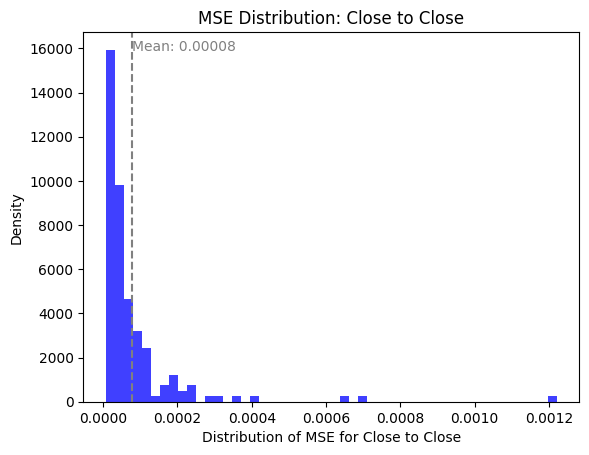

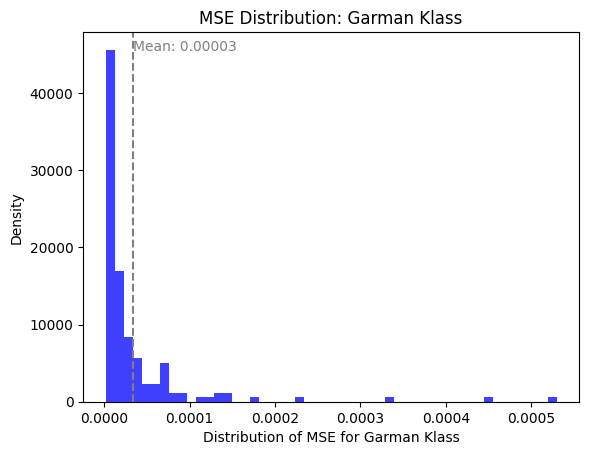

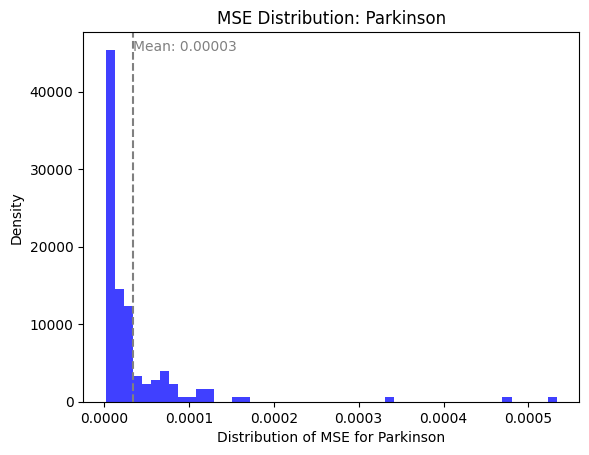

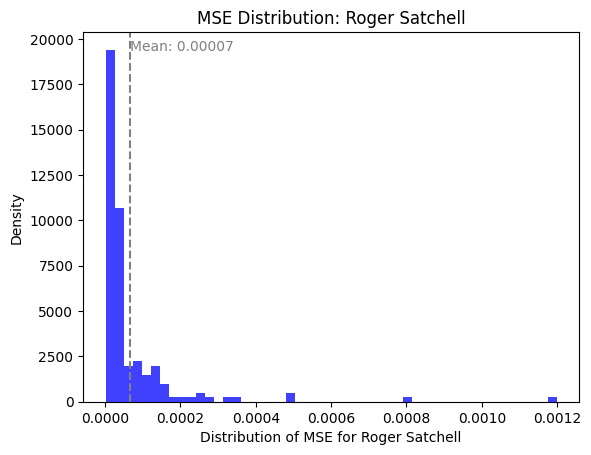

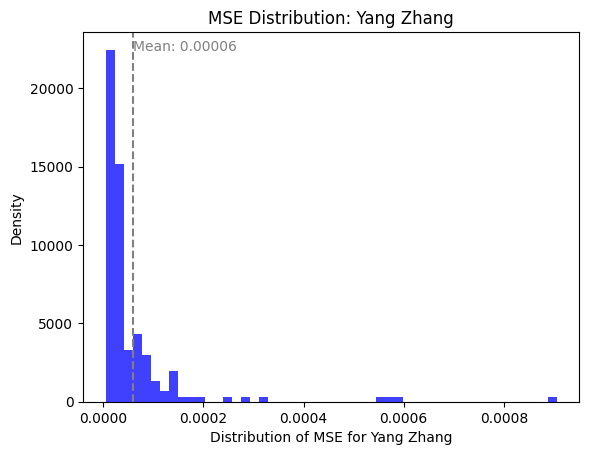

Estimators sorted from least to most biased based on MSE:
Garman Klass: 0.00003
Parkinson: 0.00003
Yang Zhang: 0.00006
Roger Satchell: 0.00007
Close to Close: 0.00008


In [56]:
import matplotlib.pyplot as plt

legends = ['Close to Close', 'Garman Klass', 'Parkinson', 'Roger Satchell', 'Yang Zhang']


mse_means = {}  

for i in range(1, 6):
    x = f'Estimator{i}'
    liste = monthly_mse[x].tolist()

    mean_mse = np.mean(liste)
    mse_means[legends[i-1]] = mean_mse  # Stocker la moyenne dans le dictionnaire avec le nom de l'estimateur correspondant
    
    density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
    plt.xlabel(f'Distribution of MSE for {legends[i-1]}')
    plt.ylabel('Density')
    plt.axvline(x=mean_mse, color='gray', linestyle='--')
    plt.text(mean_mse, plt.ylim()[1] * 0.95, f'Mean: {mean_mse:.5f}', color='gray', ha='left')
    plt.title(f'MSE Distribution: {legends[i-1]}')
    plt.show()

sorted_means = sorted(mse_means.items(), key=lambda item: item[1])
print("Estimators sorted from least to most biased based on MSE:")
for estimator, mse in sorted_means:
    print(f"{estimator}: {mse:.5f}")

Bias distribution

In [57]:
monthly_true_volatility = data['True_Volatility'].resample('M').mean()
data['True_Volatility'] = data['Close'].pct_change().rolling(window=30).std()

def calculate_monthly_mean(estimateur):
    return estimateur.resample('M').mean()

def calculate_monthly_bias(estimator, true_volatility):
    return (true_volatility-calculate_monthly_mean(estimator))

monthly_bias = pd.DataFrame({
    'Estimator1': calculate_monthly_bias(data['Estimator1'], data['True_Volatility']),
    'Estimator2': calculate_monthly_bias(data['Estimator2'], data['True_Volatility']),
    'Estimator3': calculate_monthly_bias(data['Estimator3'], data['True_Volatility']),
    'Estimator4': calculate_monthly_bias(data['Estimator4'], data['True_Volatility']),
    'Estimator5': calculate_monthly_bias(data['Estimator5'], data['True_Volatility'])
})

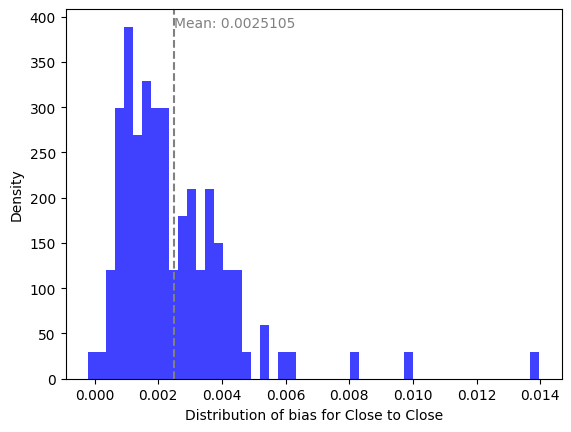

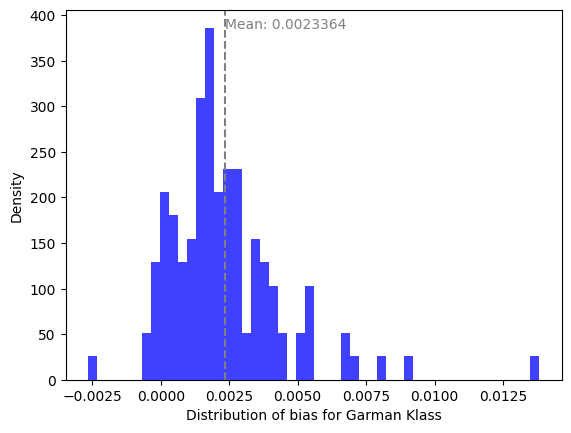

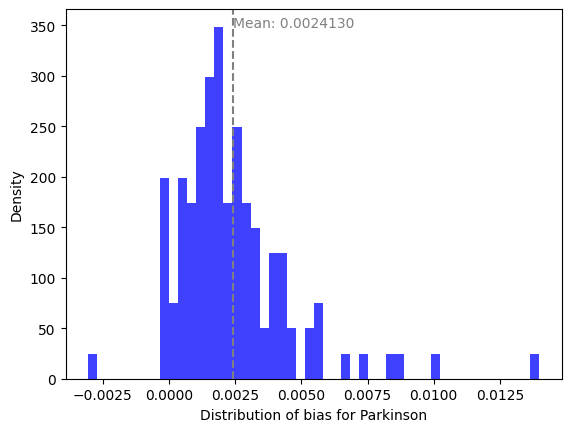

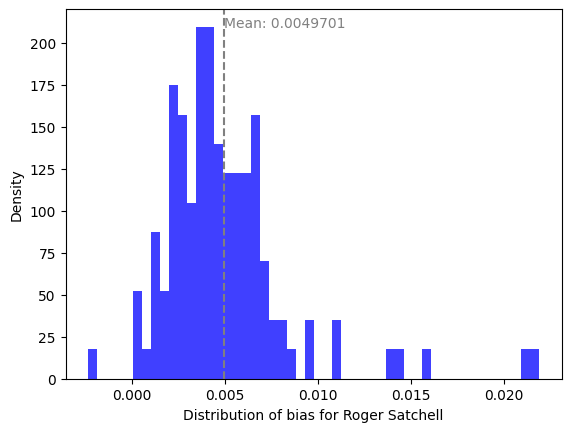

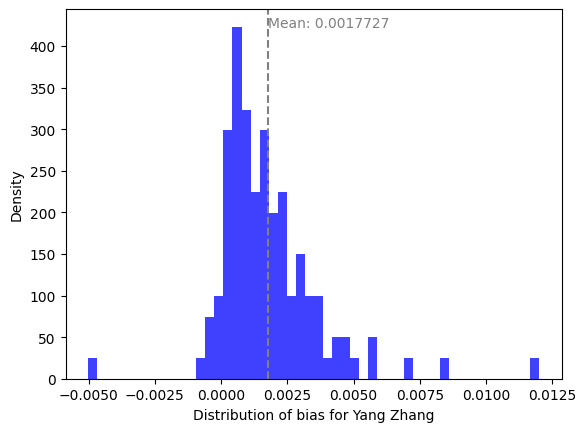

Estimators sorted from least to most biased based on MSE:
Yang Zhang: 0.0017727
Garman Klass: 0.0023364
Parkinson: 0.0024130
Close to Close: 0.0025105
Roger Satchell: 0.0049701


In [58]:
import matplotlib.pyplot as plt

bias_means = {}

for i in range (1,6):

    x = f'Estimator{i}'
    liste = monthly_bias[x].tolist()
    bias_means[legends[i-1]] = np.nanmean(liste)

    density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.xlabel(f'Distribution of bias for {legends[i-1]}')
    plt.ylabel('Density')
    plt.axvline(x=np.nanmean(liste),color='gray',linestyle='--')
    plt.text(np.nanmean(liste), plt.ylim()[1] * 0.95, f'Mean: {np.nanmean(liste):.7f}', color='gray', ha='left')
    plt.show()

sorted_estimators = sorted(bias_means.items(), key=lambda item: item[1])

# Affichage des estimateurs triés
print("Estimators sorted from least to most biased based on MSE:")
for estimator, bias in sorted_estimators:
    print(f"{estimator}: {bias:.7f}")

Visualization of Mean Variance Ratios between estimator pairs

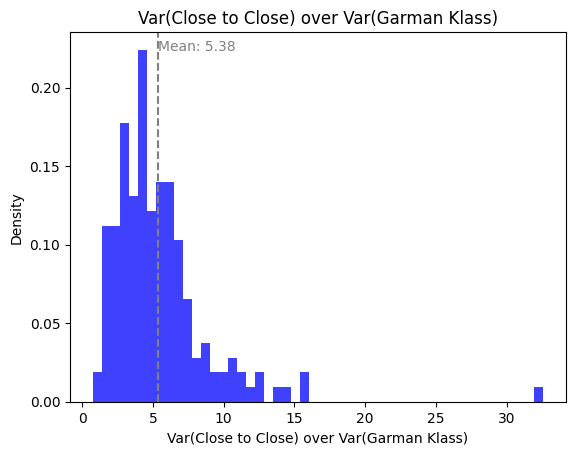

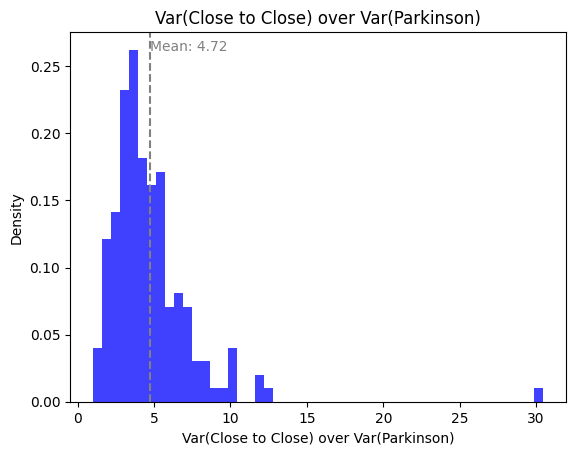

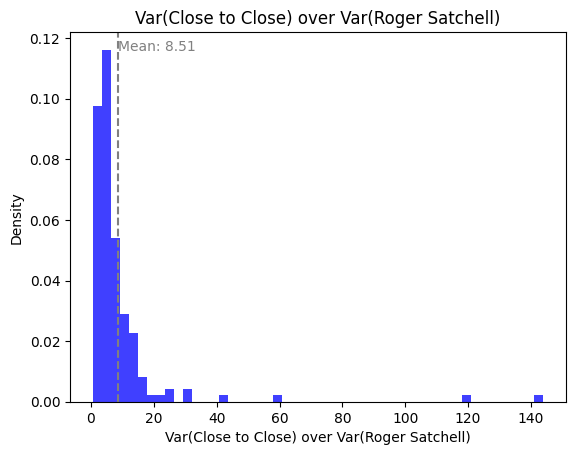

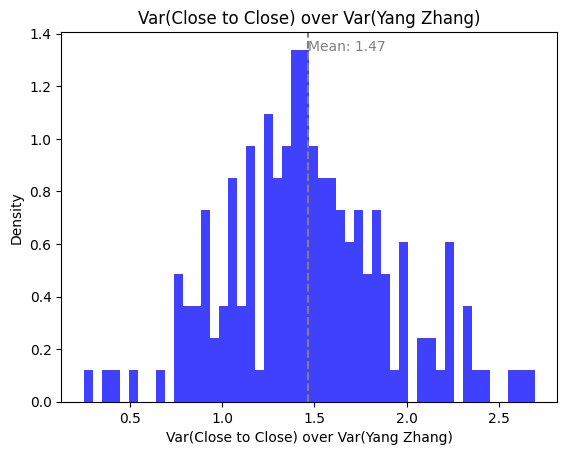

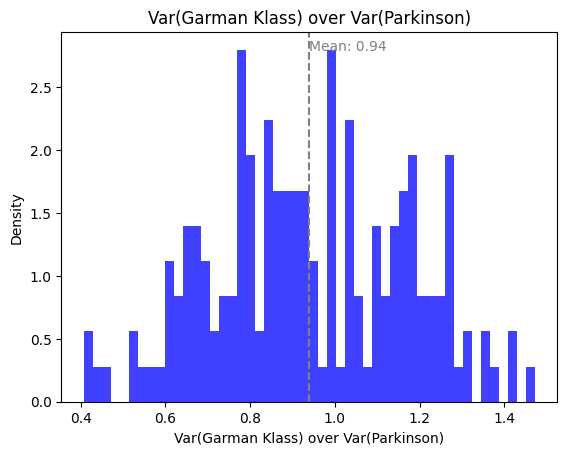

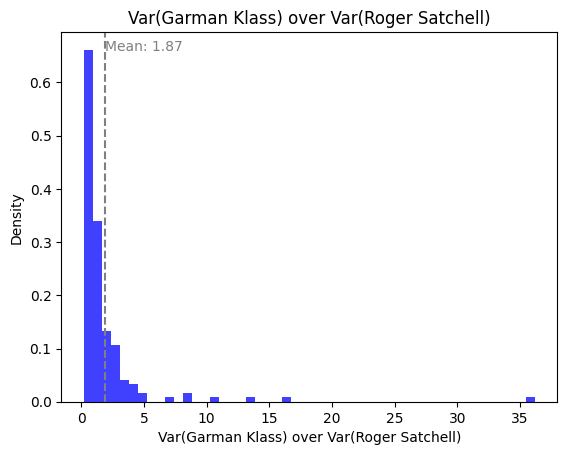

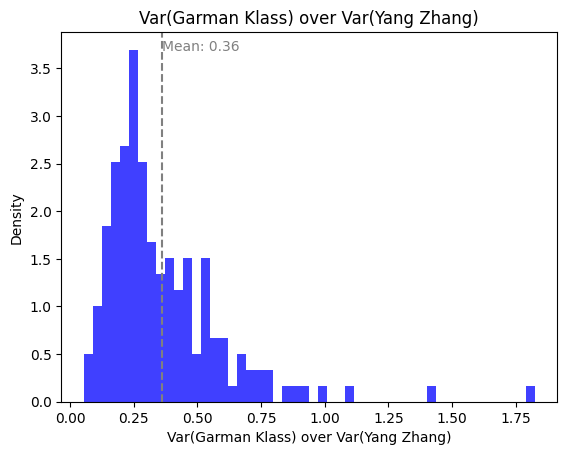

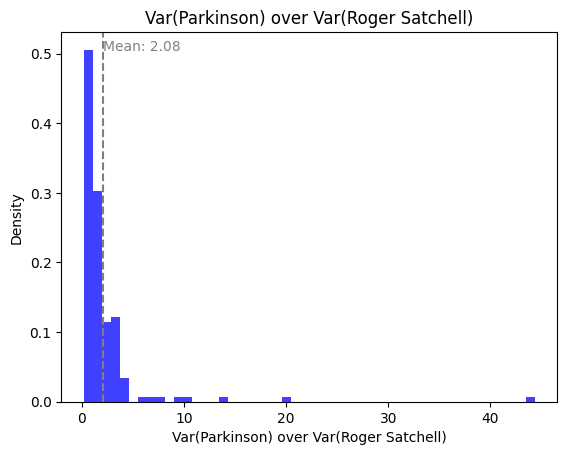

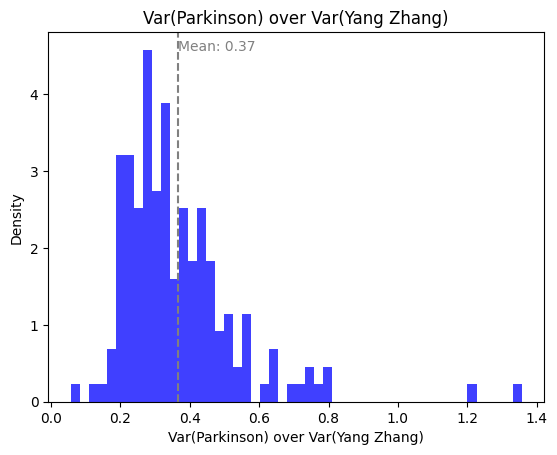

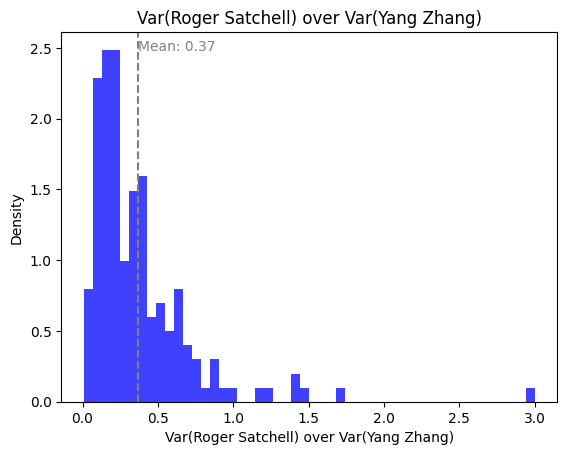

Var(Garman Klass) over Var(Yang Zhang): 0.36
Var(Parkinson) over Var(Yang Zhang): 0.37
Var(Roger Satchell) over Var(Yang Zhang): 0.37
Var(Garman Klass) over Var(Parkinson): 0.94
Var(Close to Close) over Var(Yang Zhang): 1.47
Var(Garman Klass) over Var(Roger Satchell): 1.87
Var(Parkinson) over Var(Roger Satchell): 2.08
Var(Close to Close) over Var(Parkinson): 4.72
Var(Close to Close) over Var(Garman Klass): 5.38
Var(Close to Close) over Var(Roger Satchell): 8.51


In [59]:
def calculate_monthly_var(estimator):
    return estimator.resample('M').var()

# Création d'un DataFrame avec la variance mensuelle pour chaque estimateur
monthly_var = pd.DataFrame({
    'Estimator1': calculate_monthly_var(data['Estimator1']),
    'Estimator2': calculate_monthly_var(data['Estimator2']),
    'Estimator3': calculate_monthly_var(data['Estimator3']),
    'Estimator4': calculate_monthly_var(data['Estimator4']),
    'Estimator5': calculate_monthly_var(data['Estimator5'])
})

# Fonction pour diviser les listes élément par élément
div = lambda l1, l2: [l1[k]/l2[k] for k in range(len(l1))]

# Dictionnaire pour stocker les moyennes des rapports de variance
variance_ratios_means = {}

# Boucle à travers chaque paire d'estimateurs
for i in range(1, 6):
    for j in range(i+1, 6):
        x = f'Estimator{i}'
        y = f'Estimator{j}'
        liste_x = monthly_var[x].tolist()
        liste_y = monthly_var[y].tolist()
        ratio_list = div(liste_x, liste_y)

 # Calcul de la moyenne du ratio et stockage dans le dictionnaire
        mean_ratio = np.nanmean(ratio_list)
        key_name = f'Var({legends[i-1]}) over Var({legends[j-1]})'
        variance_ratios_means[key_name] = mean_ratio
        
        # Affichage des histogrammes
        density, bins, _ = plt.hist(ratio_list, bins=50, alpha=0.75, color='blue', density=True)
        plt.xlabel(key_name)
        plt.ylabel('Density')
        plt.axvline(x=mean_ratio, color='gray', linestyle='--')
        plt.text(mean_ratio, plt.ylim()[1] * 0.95, f'Mean: {mean_ratio:.2f}', color='gray', ha='left')
        plt.title(key_name)
        plt.show()

# Affichage des moyennes triées par valeur
sorted_means = sorted(variance_ratios_means.items(), key=lambda item: item[1])
for name, mean in sorted_means:
    print(f"{name}: {mean:.2f}")

Variance distribution

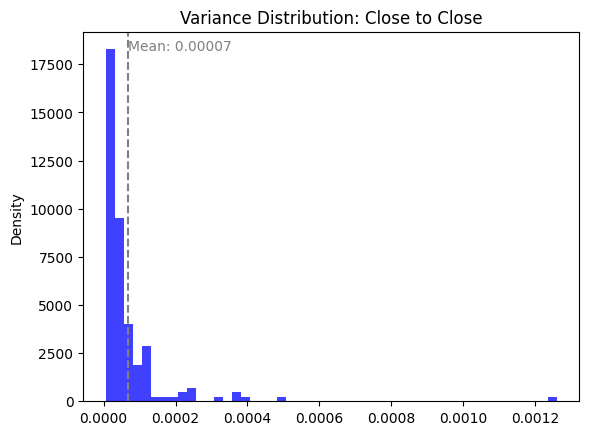

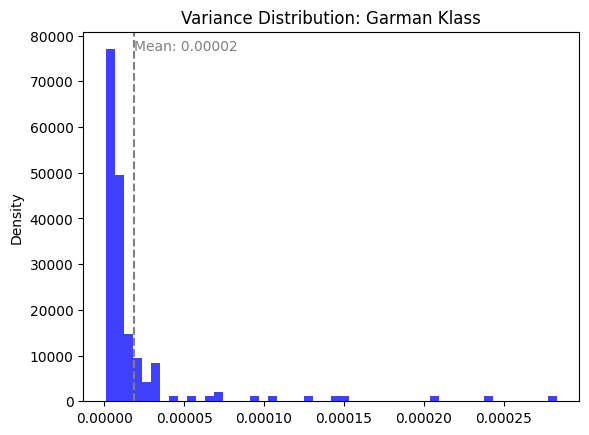

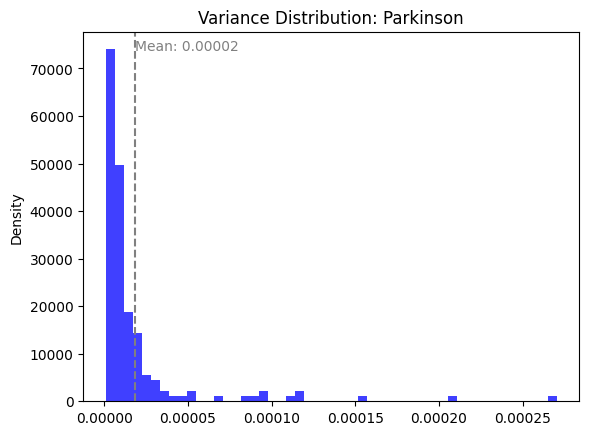

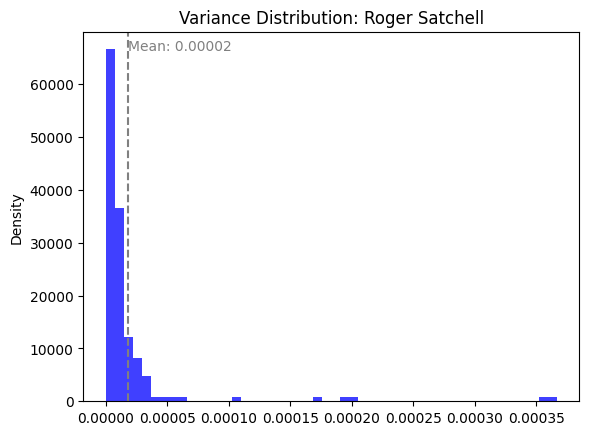

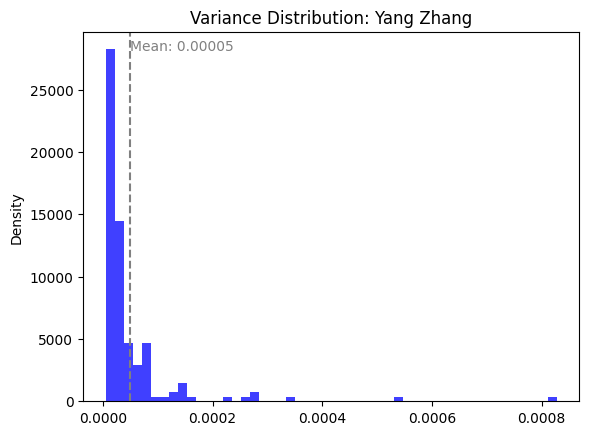

Parkinson: 0.00002
Garman Klass: 0.00002
Roger Satchell: 0.00002
Yang Zhang: 0.00005
Close to Close: 0.00007


In [60]:
var_means = {}  

for i in range(1, 6):
    x = f'Estimator{i}'
    liste = monthly_var[x].tolist()

    mean_var = np.mean(liste)
    var_means[legends[i-1]] = mean_var  
    density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
    plt.ylabel('Density')
    plt.axvline(x=mean_var, color='gray', linestyle='--')
    plt.text(mean_var, plt.ylim()[1] * 0.95, f'Mean: {mean_var:.5f}', color='gray', ha='left')
    plt.title(f'Variance Distribution: {legends[i-1]}')
    plt.show()

sorted_means = sorted(var_means.items(), key=lambda item: item[1])
for estimator, variance in sorted_means:
    print(f"{estimator}: {variance:.5f}")

III) Garch model

Garch prediction

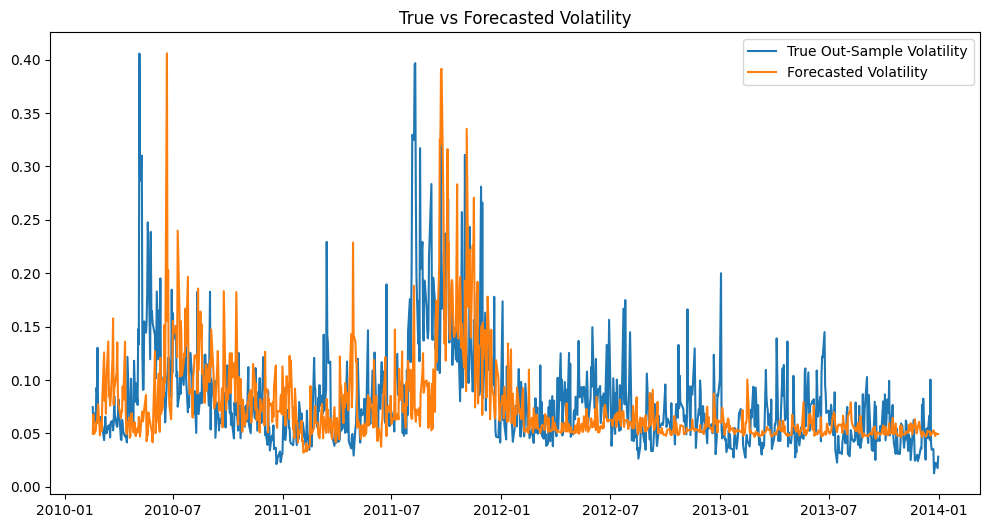

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")

# Load data
data = pd.read_csv('RealizedVarianceData.csv', low_memory=False)

# Convert dates and handle invalid values
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'], errors='coerce')
data = data.dropna(subset=['Unnamed: 0', 'Realized Variance (5-minute)'])

# Convert 'Realized Variance (5-minute)' to numeric and handle errors
data['Realized Variance (5-minute)'] = pd.to_numeric(data['Realized Variance (5-minute)'], errors='coerce')
data = data.dropna(subset=['Realized Variance (5-minute)'])

# Rename the date column
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data.set_index('Date', inplace=True)

# Use the realized variance directly
data['Realized Volatility (5-minute)'] = np.sqrt(data['Realized Variance (5-minute)']*100)

# Split data into in-sample and out-sample sets
split_date = '2010-01-01'
in_sample = data.loc[:split_date]
out_sample = data.loc[split_date:]

a=1
b=0
# Rolling window forecast
window_size = 30  
forecasts = []

for start in range(len(out_sample) - window_size):
    end = start + window_size
    train_data = pd.concat([in_sample['Realized Volatility (5-minute)'], out_sample['Realized Volatility (5-minute)'][:start]])
    
    # Fit the GARCH model
    model = arch_model(train_data, vol='Garch', p=a, q=b)
    model_fit = model.fit(disp='off')
    if b==0:    
       model_fit.params['beta[1]']=0
    # Manually forecast the volatility
    last_volatility = train_data.iloc[-1]  # Last observed volatility
    forecast_variance = model_fit.params['omega'] + model_fit.params['alpha[1]'] * (last_volatility ** 2) + model_fit.params['beta[1]'] * model_fit.conditional_volatility[-1] ** 2
    forecast_volatility = np.sqrt(forecast_variance)
    forecasts.append(forecast_volatility)

# Convert forecasts to a Series with correct index
forecasts = pd.Series(forecasts, index=out_sample.index[window_size:])

# Plot the true out-sample data and the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(out_sample.index[window_size:], out_sample['Realized Volatility (5-minute)'][window_size:], label='True Out-Sample Volatility')
plt.plot(forecasts.index, forecasts, label='Forecasted Volatility')
plt.legend()
plt.title('True vs Forecasted Volatility')
plt.show()

Garch study

[*********************100%%**********************]  1 of 1 completed
C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


    Model  p  q   Avg_MSE
0   GARCH  1  1  0.000066
1   GARCH  1  2  0.000057
2   GARCH  1  3  0.000053
3   GARCH  2  1  0.023285
4   GARCH  2  2  0.000066
5   GARCH  2  3  0.000066
6   GARCH  3  1  0.000076
7   GARCH  3  2  0.000069
8   GARCH  3  3  0.000069
9    ARCH  1  0  0.000051
10   ARCH  2  0  0.000054
11   ARCH  3  0  0.000056


C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


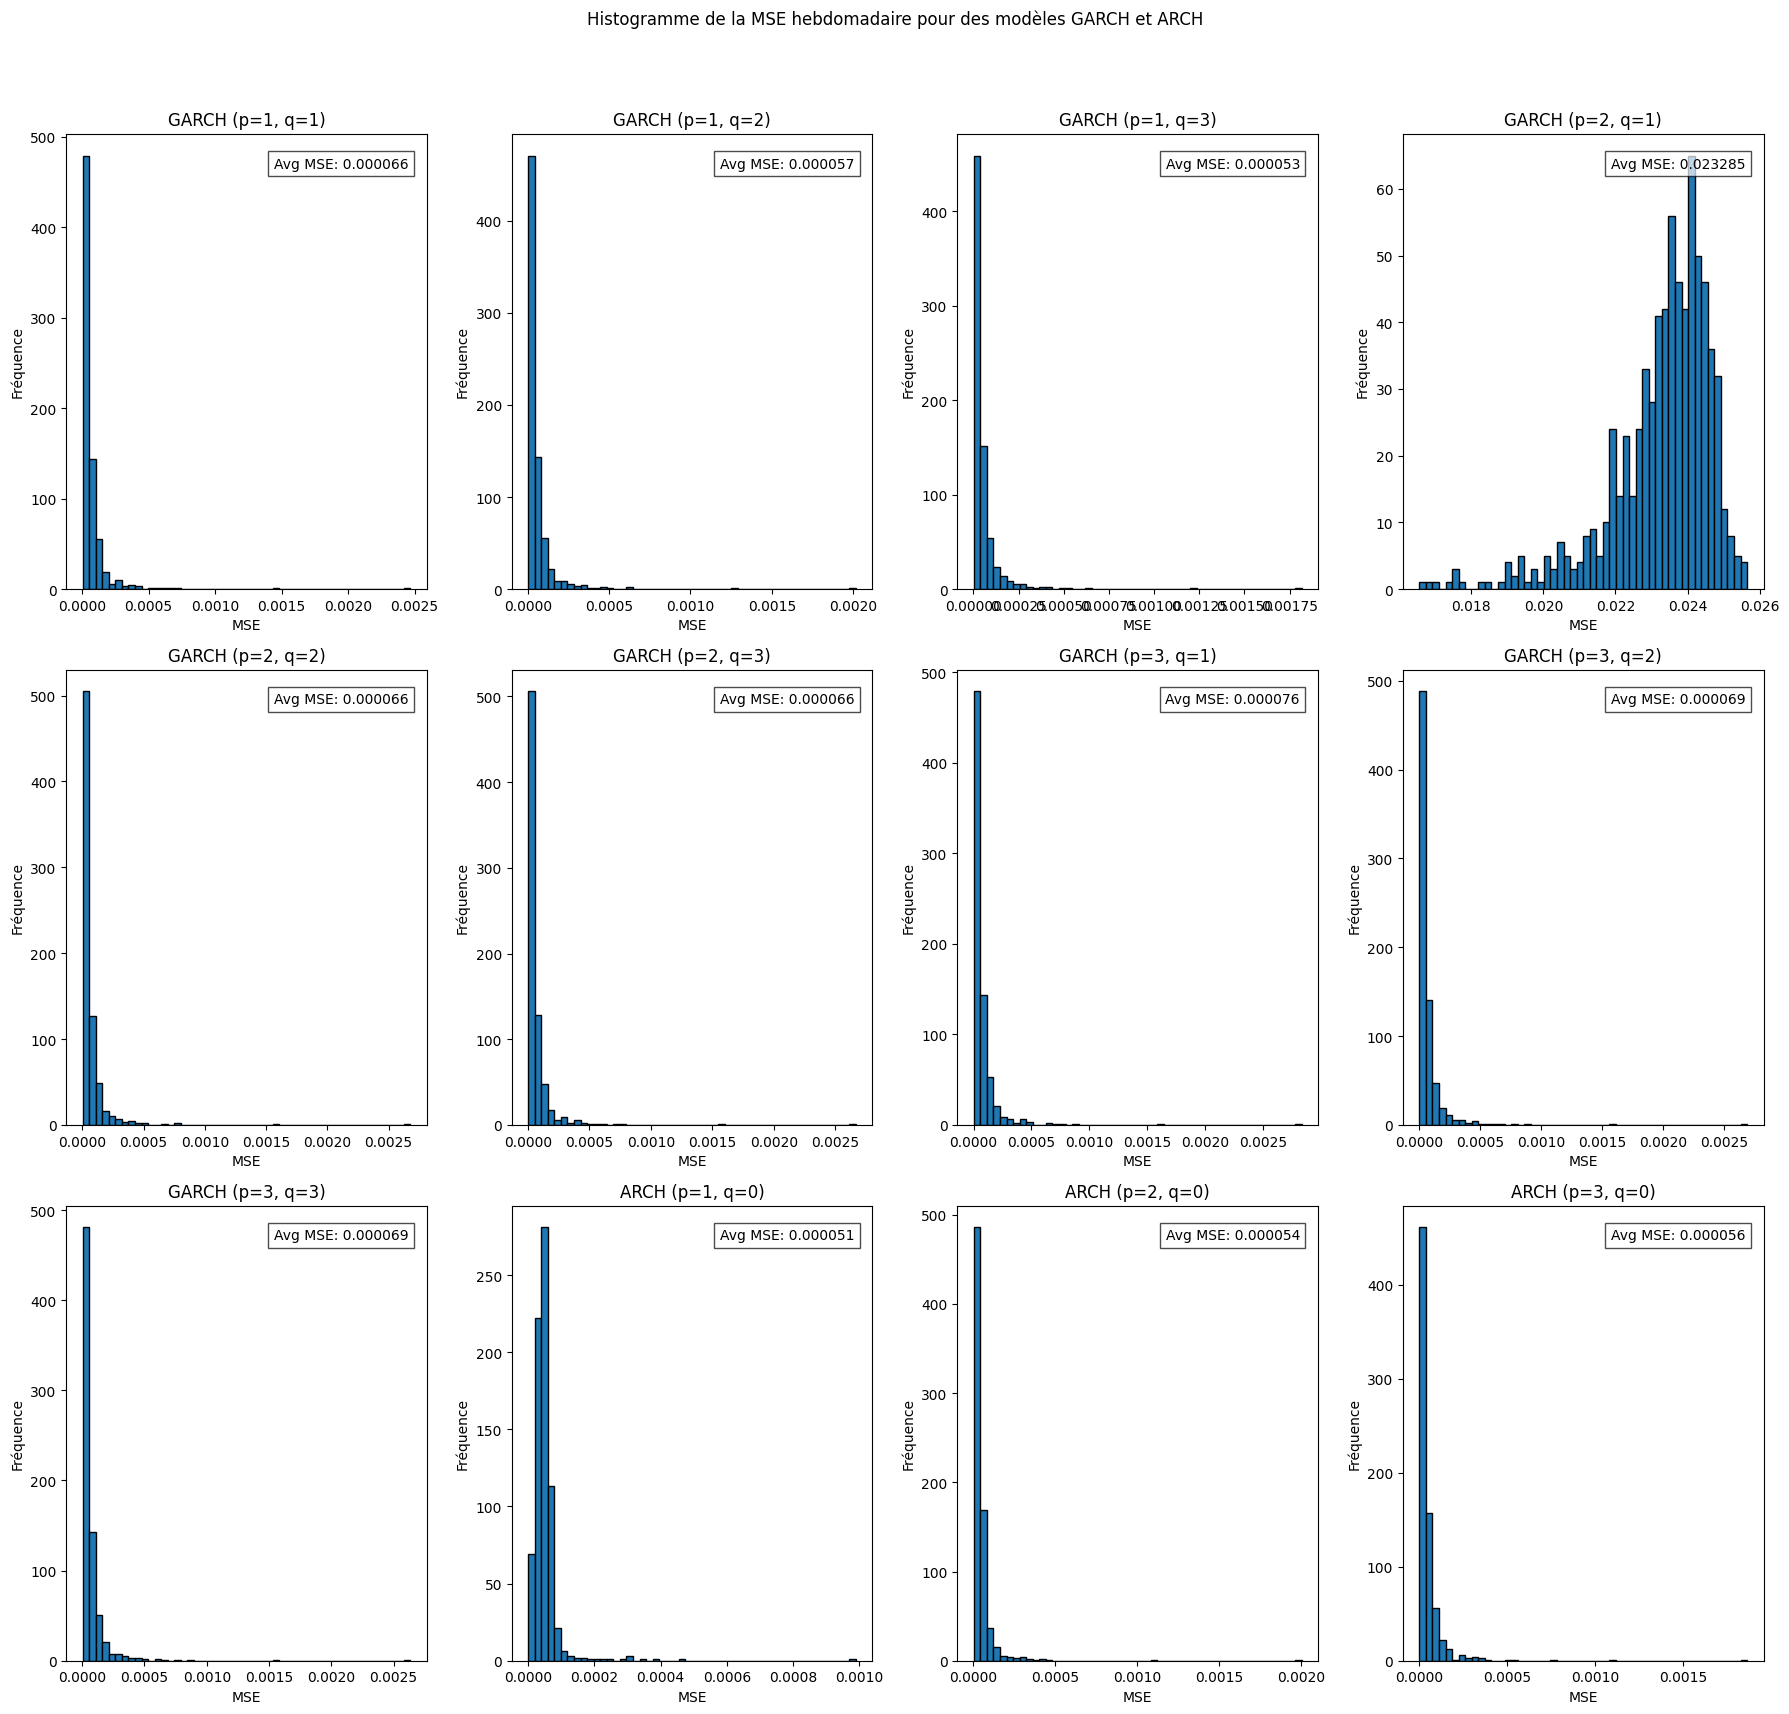

In [47]:
from arch import arch_model
warnings.filterwarnings("ignore")
def download_data(ticker='SPY', start='2000-01-01', end='2013-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Close']]
    return data

# Application des modèles de séries temporelles GARCH
def apply_garch_model(log_returns, p, q):
    p, q = int(p), int(q)  # S'assurer que p et q sont des entiers
    model = arch_model(log_returns, vol='Garch', p=p, q=q, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# Application des modèles de séries temporelles ARCH
def apply_arch_model(log_returns, p):
    p = int(p)  # S'assurer que p est un entier
    model = arch_model(log_returns, vol='ARCH', p=p, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# Calcul de la MSE hebdomadaire
def calculate_weekly_mse(realized_vol, predicted_vol):
    mse_weekly = ((realized_vol - predicted_vol) ** 2).resample('W').mean()
    return mse_weekly

# Programme principal
if __name__ == "__main__":
    data = download_data()
    
    # Calcul des rendements logarithmiques
    log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
    
    # Calcul de la volatilité réalisée comme la valeur absolue des rendements logarithmiques quotidiens
    realized_vol = log_returns.abs()

    # Initialisation des résultats
    results = []

    # Comparaison des modèles GARCH pour p, q dans [1, 2, 3]
    for p in range(1, 4):
        for q in range(1, 4):
            predicted_vol_garch = apply_garch_model(log_returns, p, q)
            predicted_vol_garch = predicted_vol_garch[-len(realized_vol):]
            mse_weekly_garch = calculate_weekly_mse(realized_vol, predicted_vol_garch)
            avg_mse_garch = mse_weekly_garch.mean()
            results.append(('GARCH', p, q, avg_mse_garch))

    # Comparaison des modèles ARCH pour p dans [1, 2, 3]
    for p in range(1, 4):
        predicted_vol_arch = apply_arch_model(log_returns, p)
        predicted_vol_arch = predicted_vol_arch[-len(realized_vol):]
        mse_weekly_arch = calculate_weekly_mse(realized_vol, predicted_vol_arch)
        avg_mse_arch = mse_weekly_arch.mean()
        results.append(('ARCH', p, 0, avg_mse_arch))  # q=0 pour ARCH

    # Conversion des résultats en DataFrame pour affichage
    results_df = pd.DataFrame(results, columns=['Model', 'p', 'q', 'Avg_MSE'])
    
    # Affichage des résultats
    print(results_df)

    # Calcul du nombre de lignes et de colonnes pour les subplots
    num_models = len(results_df)
    num_cols = 4
    num_rows = (num_models + num_cols - 1) // num_cols  # Calcul du nombre de lignes nécessaires

    # Préparation des histogrammes pour chaque modèle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
    fig.suptitle('Histogramme de la MSE hebdomadaire pour des modèles GARCH et ARCH')

    for index, (model, p, q, avg_mse) in enumerate(results):
        if model == 'GARCH':
            predicted_vol = apply_garch_model(log_returns, p, q)
        else:
            predicted_vol = apply_arch_model(log_returns, p)
        
        predicted_vol = predicted_vol[-len(realized_vol):]
        mse_weekly = calculate_weekly_mse(realized_vol, predicted_vol)
        
        ax = axs[index // num_cols, index % num_cols]
        ax.hist(mse_weekly.dropna(), bins=50, edgecolor='black')
        ax.set_title(f'{model} (p={p}, q={q})')
        ax.set_xlabel('MSE')
        ax.set_ylabel('Fréquence')
        ax.text(0.95, 0.95, f'Avg MSE: {avg_mse:.6f}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    # Supprimer les axes vides
    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Arch and garch bias

[*********************100%%**********************]  1 of 1 completed
C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


    Model  p  q  Avg_Weekly_Bias
0   GARCH  1  1         0.000066
1   GARCH  1  2         0.000066
2   GARCH  1  3         0.000065
3   GARCH  2  1         0.000066
4   GARCH  2  2         0.000066
5   GARCH  2  3         0.000066
6   GARCH  3  1         0.000067
7   GARCH  3  2         0.000066
8   GARCH  3  3         0.000067
9    ARCH  1  0         0.000056
10   ARCH  2  0         0.000056
11   ARCH  3  0         0.000060


C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


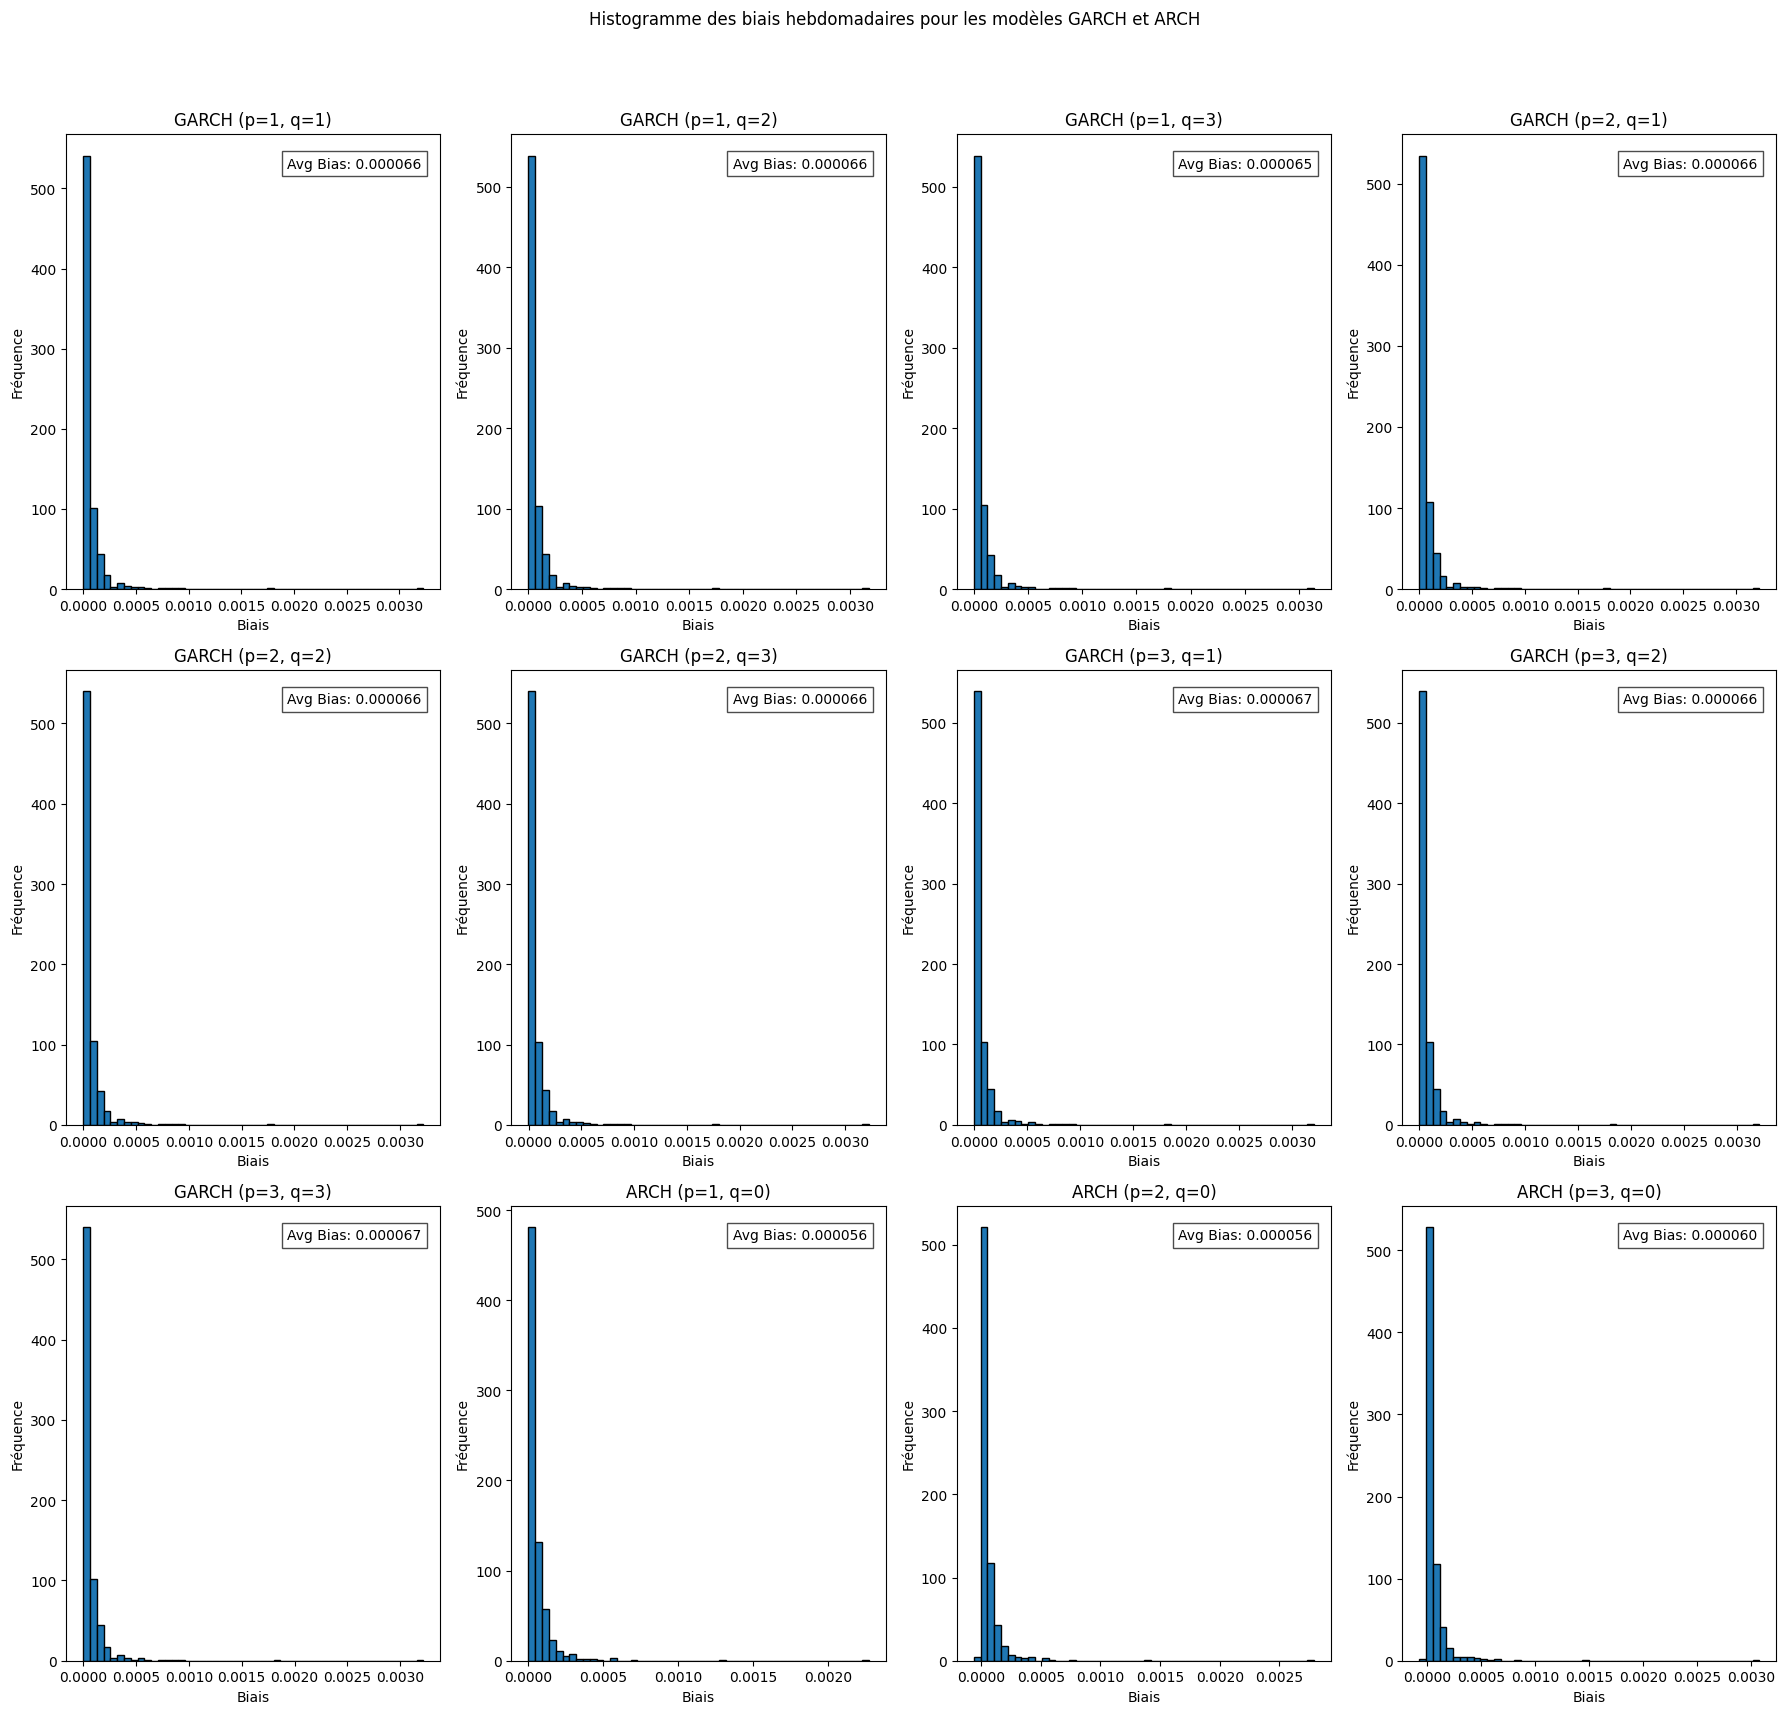

In [62]:
import warnings
warnings.filterwarnings("ignore")
def download_data(ticker='SPY', start='2000-01-01', end='2013-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Close']]
    return data

# GARCH
def apply_garch_model(log_returns, p, q):
    p, q = int(p), int(q)
    model = arch_model(log_returns, vol='Garch', p=p, q=q, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# ARCH
def apply_arch_model(log_returns, p):
    p = int(p)
    model = arch_model(log_returns, vol='ARCH', p=p, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# variances hebdomadaires
def calculate_weekly_variance(volatility, index):
    volatility_series = pd.Series(volatility, index=index)
    var_weekly = volatility_series.resample('W').var()
    return var_weekly

# biais hebdomadaire
def calculate_weekly_bias(realized_vol, predicted_vol, index):
    var_realized_weekly = calculate_weekly_variance(realized_vol, index)
    var_predicted_weekly = calculate_weekly_variance(predicted_vol, index)
    bias_weekly = var_realized_weekly - var_predicted_weekly
    return bias_weekly

if __name__ == "__main__":
    data = download_data()
    
    log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
    
    realized_vol = log_returns.abs()
  
    results = []

    # GARCH pour p, q dans [1, 2, 3]
    for p in range(1, 4):
        for q in range(1, 4):
            predicted_vol_garch = apply_garch_model(log_returns, p, q)
            predicted_vol_garch = predicted_vol_garch[-len(realized_vol):]
            bias_weekly_garch = calculate_weekly_bias(realized_vol, predicted_vol_garch, realized_vol.index)
            avg_bias_garch = bias_weekly_garch.mean()
            results.append(('GARCH', p, q, avg_bias_garch))

    # ARCH pour p dans [1, 2, 3]
    for p in range(1, 4):
        predicted_vol_arch = apply_arch_model(log_returns, p)
        predicted_vol_arch = predicted_vol_arch[-len(realized_vol):]
        bias_weekly_arch = calculate_weekly_bias(realized_vol, predicted_vol_arch, realized_vol.index)
        avg_bias_arch = bias_weekly_arch.mean()
        results.append(('ARCH', p, 0, avg_bias_arch))

    results_df = pd.DataFrame(results, columns=['Model', 'p', 'q', 'Avg_Weekly_Bias'])
    
    print(results_df)

    num_models = len(results_df)
    num_cols = 4
    num_rows = (num_models + num_cols - 1) // num_cols 

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
    fig.suptitle('Histogramme des biais hebdomadaires pour les modèles GARCH et ARCH')

    for index, (model, p, q, avg_bias) in enumerate(results):
        if model == 'GARCH':
            predicted_vol = apply_garch_model(log_returns, p, q)
        else:
            predicted_vol = apply_arch_model(log_returns, p)
        
        predicted_vol = predicted_vol[-len(realized_vol):]
        bias_weekly = calculate_weekly_bias(realized_vol, predicted_vol, realized_vol.index)
        
        ax = axs[index // num_cols, index % num_cols]
        ax.hist(bias_weekly.dropna(), bins=50, edgecolor='black')
        ax.set_title(f'{model} (p={p}, q={q})')
        ax.set_xlabel('Biais')
        ax.set_ylabel('Fréquence')
        ax.text(0.95, 0.95, f'Avg Bias: {avg_bias:.6f}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Arch and garch variance

[*********************100%%**********************]  1 of 1 completed
C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


    Model  p  q  Avg_Weekly_Variance
0   GARCH  1  1         7.022556e-07
1   GARCH  1  2         1.554951e-06
2   GARCH  1  3         2.358195e-06
3   GARCH  2  1         1.589252e-06
4   GARCH  2  2         1.094078e-06
5   GARCH  2  3         9.757206e-07
6   GARCH  3  1         5.360365e-07
7   GARCH  3  2         8.345749e-07
8   GARCH  3  3         6.245991e-07
9    ARCH  1  0         1.089089e-05
10   ARCH  2  0         1.076907e-05
11   ARCH  3  0         7.464598e-06


C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\pauld\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


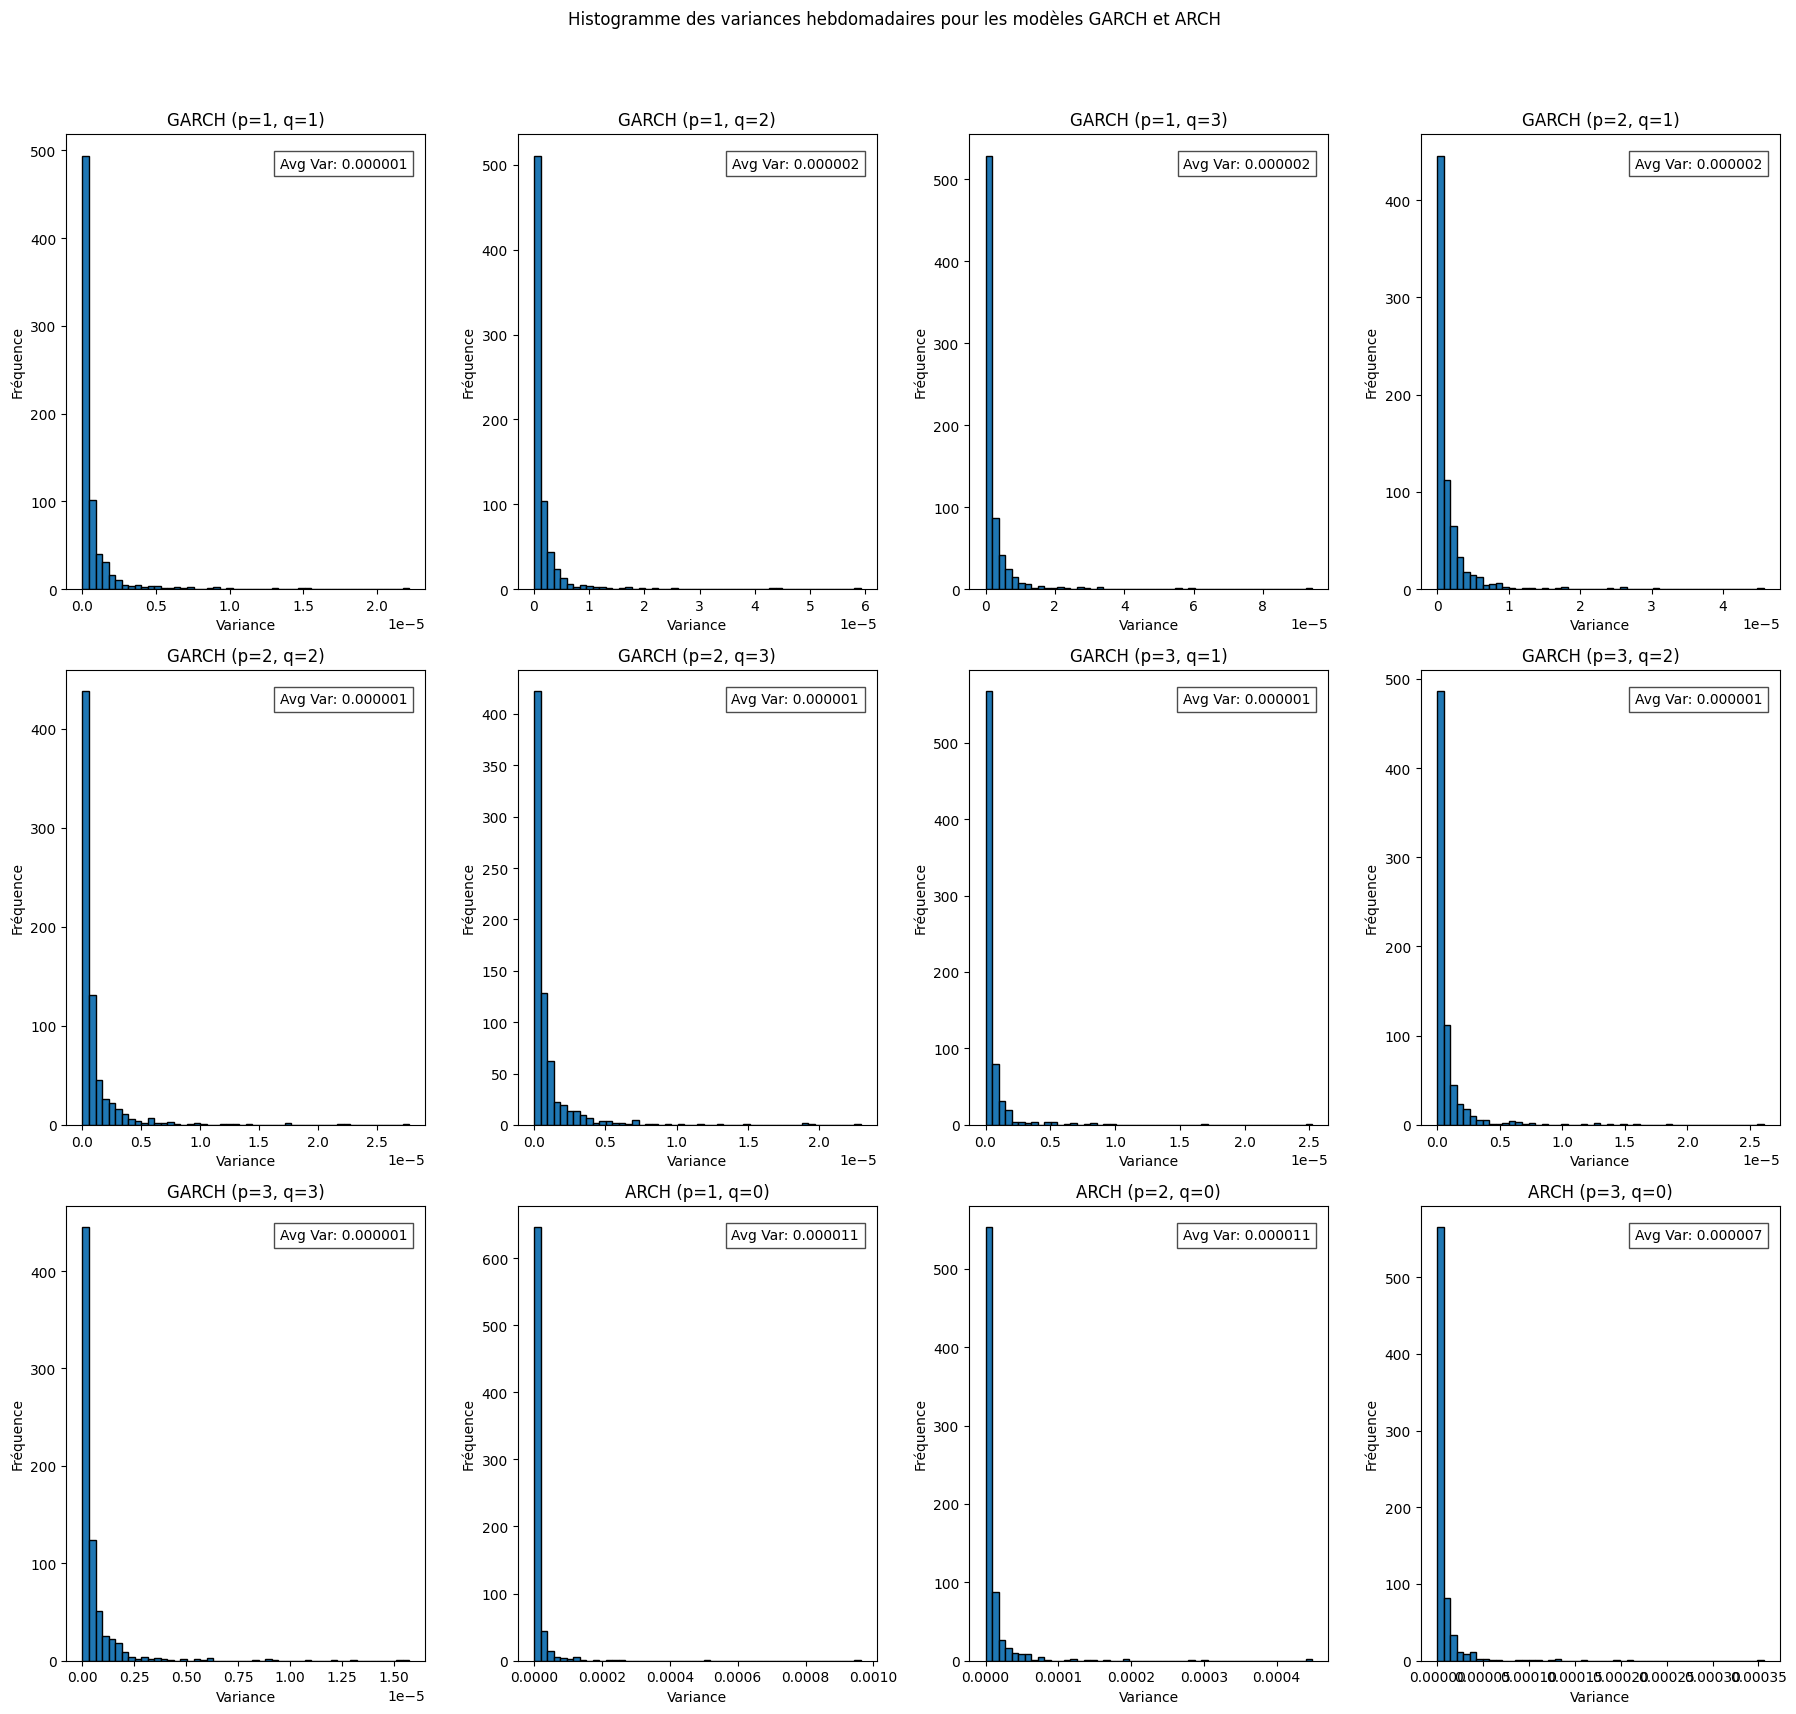

In [64]:


# Télécharger les données historiques de SPY
def download_data(ticker='SPY', start='2000-01-01', end='2013-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Open', 'High', 'Low', 'Close']]
    return data

# Application des modèles de séries temporelles GARCH
def apply_garch_model(log_returns, p, q):
    p, q = int(p), int(q)  # S'assurer que p et q sont des entiers
    model = arch_model(log_returns, vol='Garch', p=p, q=q, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# Application des modèles de séries temporelles ARCH
def apply_arch_model(log_returns, p):
    p = int(p)  # S'assurer que p est un entier
    model = arch_model(log_returns, vol='ARCH', p=p, rescale=False)
    model_fit = model.fit(disp="off")
    forecasts = model_fit.forecast(horizon=1, start=0)
    predicted_vol = np.sqrt(forecasts.variance.values.flatten())
    return predicted_vol

# Calcul des variances hebdomadaires
def calculate_weekly_variance(volatility, index):
    volatility_series = pd.Series(volatility, index=index)
    var_weekly = volatility_series.resample('W').var()
    return var_weekly

# Programme principal
if __name__ == "__main__":
    data = download_data()
    
    # Calcul des rendements logarithmiques
    log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
    
    # Calcul de la volatilité réalisée comme la valeur absolue des rendements logarithmiques quotidiens
    realized_vol = log_returns.abs()

    # Initialisation des résultats
    results = []

    # Comparaison des modèles GARCH pour p, q dans [1, 2, 3]
    for p in range(1, 4):
        for q in range(1, 4):
            predicted_vol_garch = apply_garch_model(log_returns, p, q)
            predicted_vol_garch = predicted_vol_garch[-len(realized_vol):]
            var_weekly_garch = calculate_weekly_variance(predicted_vol_garch, realized_vol.index)
            avg_var_garch = var_weekly_garch.mean()
            results.append(('GARCH', p, q, avg_var_garch))

    # Comparaison des modèles ARCH pour p dans [1, 2, 3]
    for p in range(1, 4):
        predicted_vol_arch = apply_arch_model(log_returns, p)
        predicted_vol_arch = predicted_vol_arch[-len(realized_vol):]
        var_weekly_arch = calculate_weekly_variance(predicted_vol_arch, realized_vol.index)
        avg_var_arch = var_weekly_arch.mean()
        results.append(('ARCH', p, 0, avg_var_arch))  # q=0 pour ARCH

    # Conversion des résultats en DataFrame pour affichage
    results_df = pd.DataFrame(results, columns=['Model', 'p', 'q', 'Avg_Weekly_Variance'])
    
    # Affichage des résultats
    print(results_df)

    # Calcul du nombre de lignes et de colonnes pour les subplots
    num_models = len(results_df)
    num_cols = 4
    num_rows = (num_models + num_cols - 1) // num_cols  # Calcul du nombre de lignes nécessaires

    # Préparation des histogrammes pour chaque modèle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
    fig.suptitle('Histogramme des variances hebdomadaires pour les modèles GARCH et ARCH')

    for index, (model, p, q, avg_var) in enumerate(results):
        if model == 'GARCH':
            predicted_vol = apply_garch_model(log_returns, p, q)
        else:
            predicted_vol = apply_arch_model(log_returns, p)
        
        predicted_vol = predicted_vol[-len(realized_vol):]
        var_weekly = calculate_weekly_variance(predicted_vol, realized_vol.index)
        
        ax = axs[index // num_cols, index % num_cols]
        ax.hist(var_weekly.dropna(), bins=50, edgecolor='black')
        ax.set_title(f'{model} (p={p}, q={q})')
        ax.set_xlabel('Variance')
        ax.set_ylabel('Fréquence')
        ax.text(0.95, 0.95, f'Avg Var: {avg_var:.6f}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    # Supprimer les axes vides
    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()